<a href="https://colab.research.google.com/github/DaoOfDreams/DAV_52/blob/main/DAV_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California Housing Data from the Sample dataset available in the Colab.

MLR using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
processed_df = df.drop(['households'], axis=1)
processed_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,15.000100,500001.000000


In [4]:
processed_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

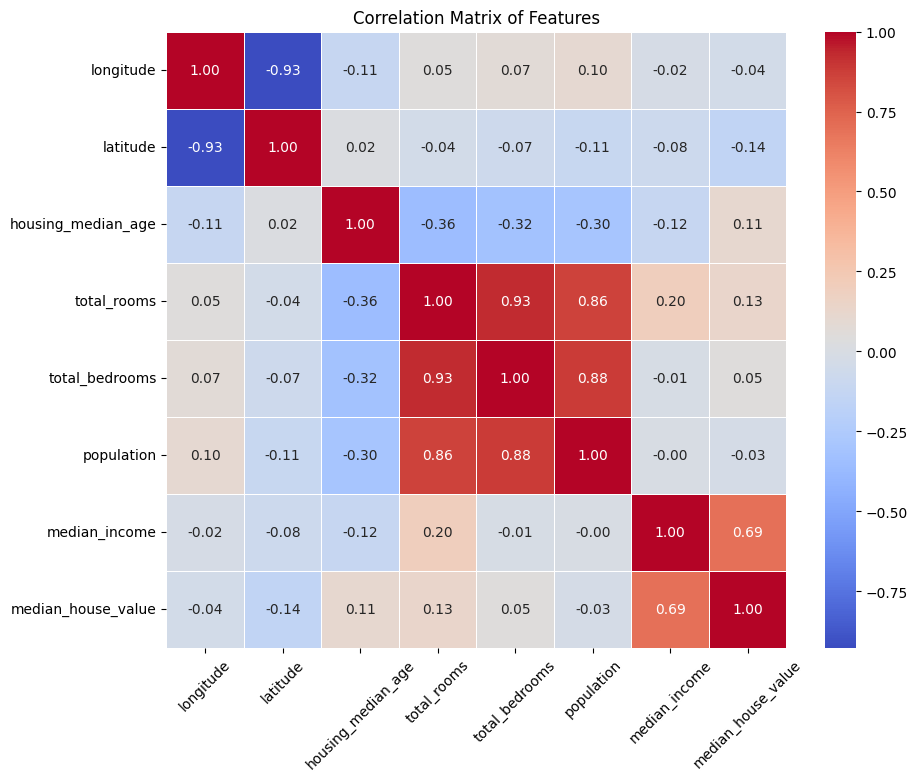

In [6]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Matrix of Features')
plt.show()

In [7]:
processed_df = processed_df[processed_df['total_bedrooms'] <= 1000]

In [32]:
X = processed_df[['median_income','latitude','longitude','housing_median_age']]
y = processed_df['median_house_value']
print(X.shape)
print(y.shape)

(15424, 4)
(15424,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_pred))
print("Max error:",metrics.max_error(y_test,y_pred))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_pred))

Explaind variance: 0.6051656792355187
Max error: 548912.6392186978
Mean absolute error: 53906.25423092364
Mean squared error: 5356692177.920791
R-2 score: 0.6051505081017952


In [36]:
model.coef_

array([ 38612.30664954, -43425.07993199, -44165.78860387,   1054.04528011])

In [44]:
equation_text = f'y = {model.coef_[0]:.2f}x1 + {model.coef_[1]:.2f}x2 + {model.coef_[2]:.2f}x3 + {model.coef_[3]:.2f}x4 + {model.intercept_:.2f}'
print("Equation of the line: ",equation_text)

Equation of the line:  y = 38612.31x1 + -43425.08x2 + -44165.79x3 + 1054.05x4 + -3708925.69


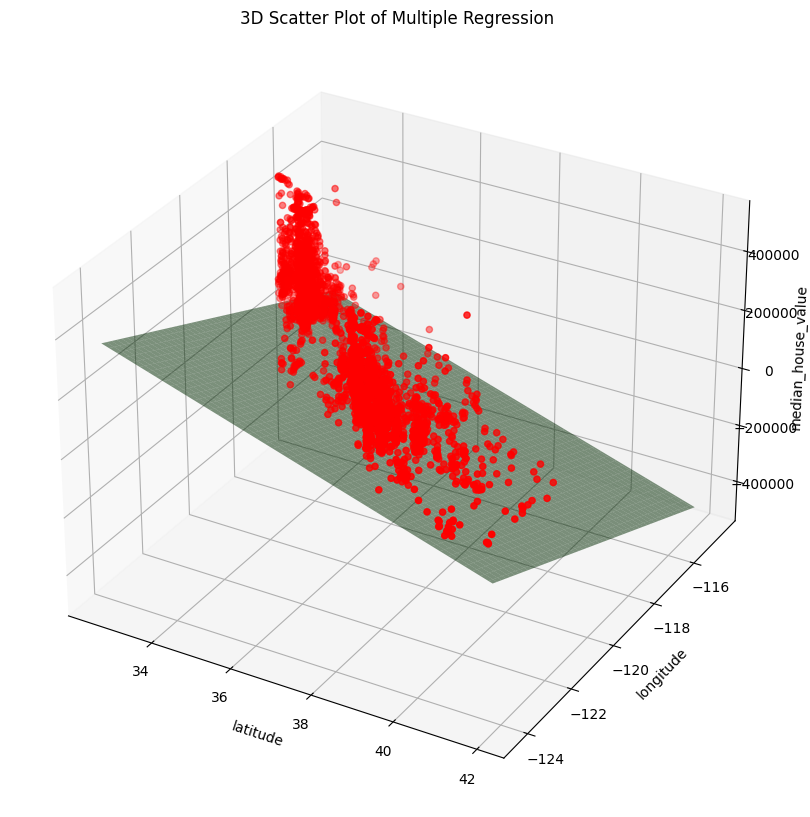

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X_train["latitude"], X_train["longitude"], y_train, color='blue', label='Training data')
ax.scatter(X_test["latitude"], X_test["longitude"], y_test, color='red', label='Test data')

xx, yy = np.meshgrid(np.linspace(X_train["latitude"].min(), X_train["latitude"].max(), 100),
                     np.linspace(X_train["longitude"].min(), X_train["longitude"].max(), 100))
zz = model.intercept_ + model.coef_[1] * xx + model.coef_[2] * yy

ax.plot_surface(xx, yy, zz, alpha=0.5, color='green', label='Regression plane')

ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('median_house_value')
ax.set_title('3D Scatter Plot of Multiple Regression')

plt.show()

MLR using R

In [1]:
df <- read.csv("/content/sample_data/california_housing_train.csv")
head(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
2,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
3,-114.56,33.69,17,720,174,333,117,1.6509,85700
4,-114.57,33.64,14,1501,337,515,226,3.1917,73400
5,-114.57,33.57,20,1454,326,624,262,1.9250,65500
6,-114.58,33.63,29,1387,236,671,239,3.3438,74000


In [2]:
summary(df)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1462  
 Median :-118.5   Median :34.25   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.59      Mean   : 2644  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3151  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :37937  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  790   1st Qu.: 282.0   1st Qu.: 2.5664  
 Median : 434.0   Median : 1167   Median : 409.0   Median : 3.5446  
 Mean   : 539.4   Mean   : 1430   Mean   : 501.2   Mean   : 3.8836  
 3rd Qu.: 648.2   3rd Qu.: 1721   3rd Qu.: 605.2   3rd Qu.: 4.7670  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value
 Min.   : 1499

In [3]:
install.packages(c("ggcorrplot","ggplot2","viridis"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: ggplot2

Loading required package: viridisLite



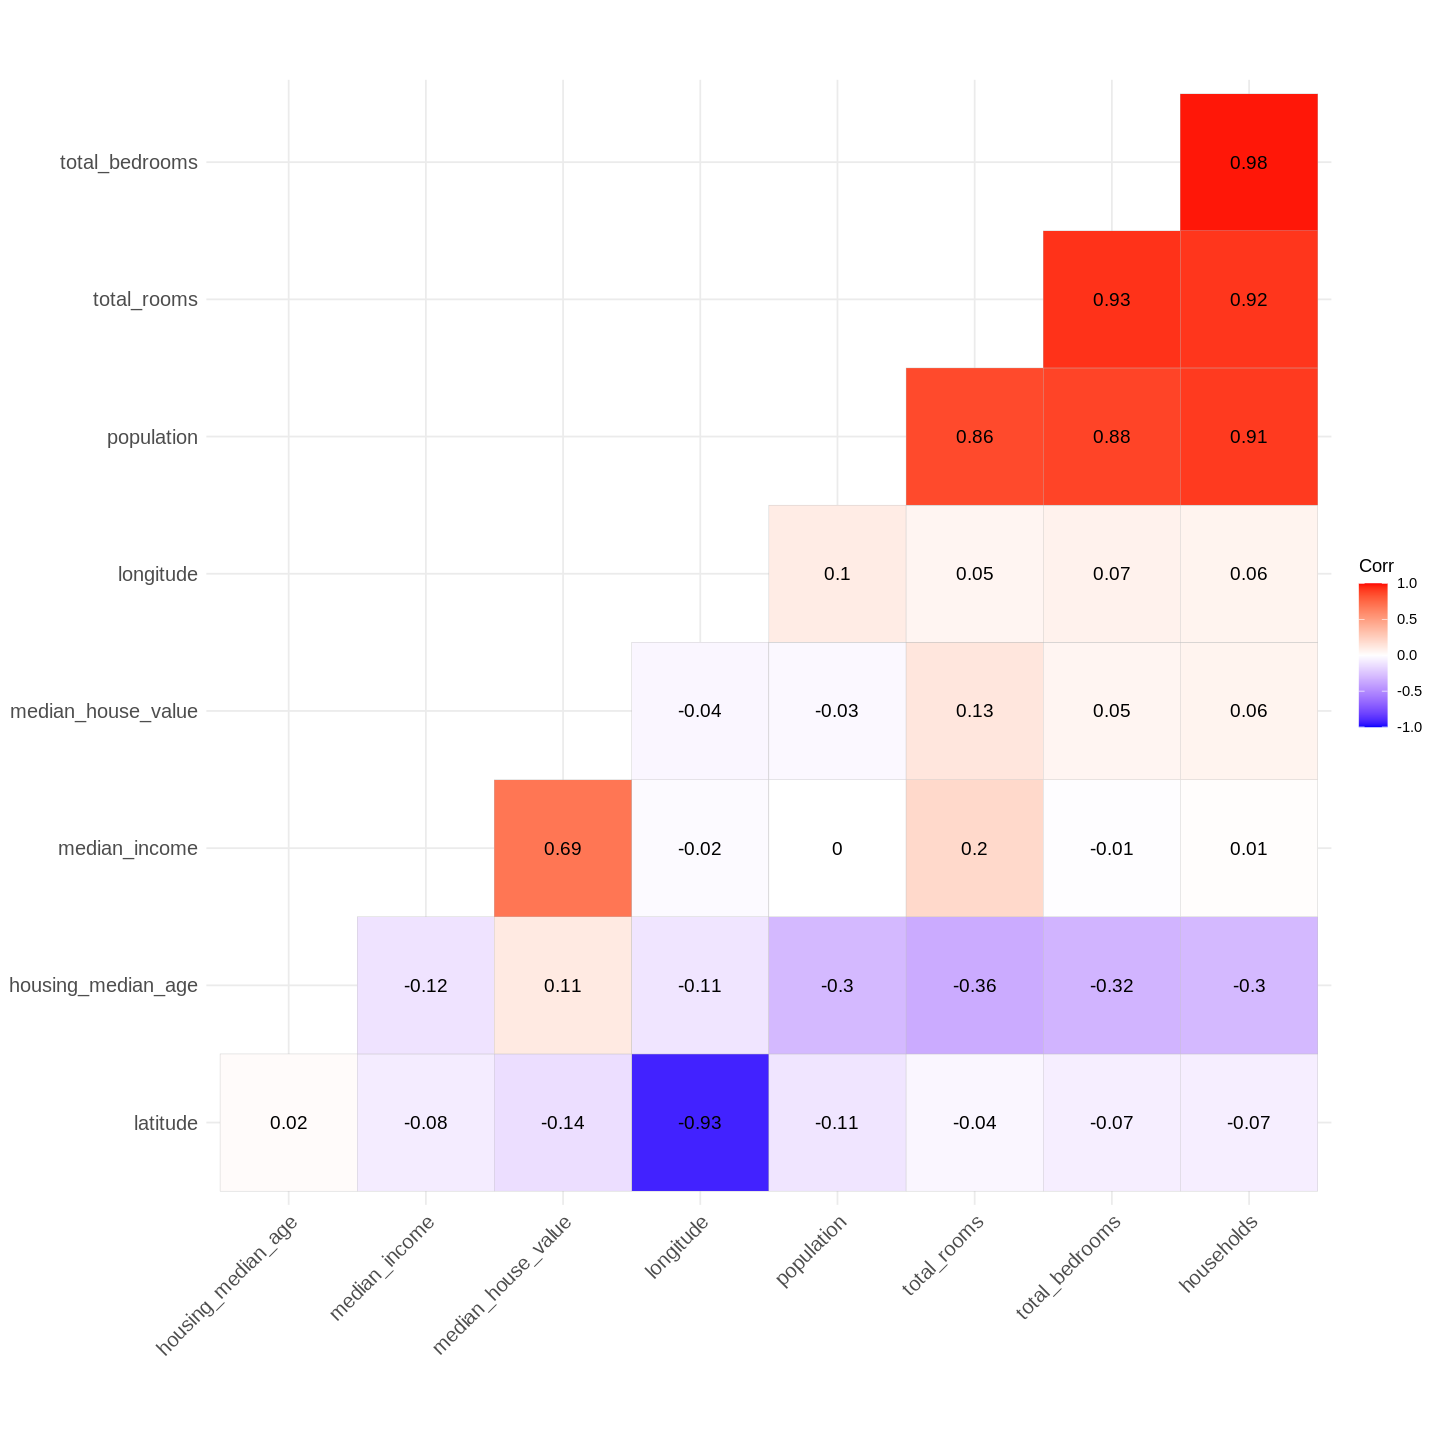

In [4]:
library(ggcorrplot)
library(ggplot2)
library(viridis)

options(repr.plot.width =12, repr.plot.height =12)

Correlation_matrix <- cor(df)
ggcorrplot(Correlation_matrix, hc.order = TRUE, type = "lower",lab = TRUE)

In [5]:
model <- lm(median_house_value ~ median_income + latitude + longitude + housing_median_age, data = df)
summary(model)


Call:
lm(formula = median_house_value ~ median_income + latitude + 
    longitude + housing_median_age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-543354  -48040  -14033   32331  486741 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.792e+06  7.063e+04  -53.68   <2e-16 ***
median_income       3.804e+04  3.109e+02  122.39   <2e-16 ***
latitude           -4.450e+04  7.474e+02  -59.54   <2e-16 ***
longitude          -4.524e+04  7.996e+02  -56.58   <2e-16 ***
housing_median_age  9.533e+02  4.727e+01   20.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73540 on 16995 degrees of freedom
Multiple R-squared:  0.5981,	Adjusted R-squared:  0.598 
F-statistic:  6323 on 4 and 16995 DF,  p-value: < 2.2e-16


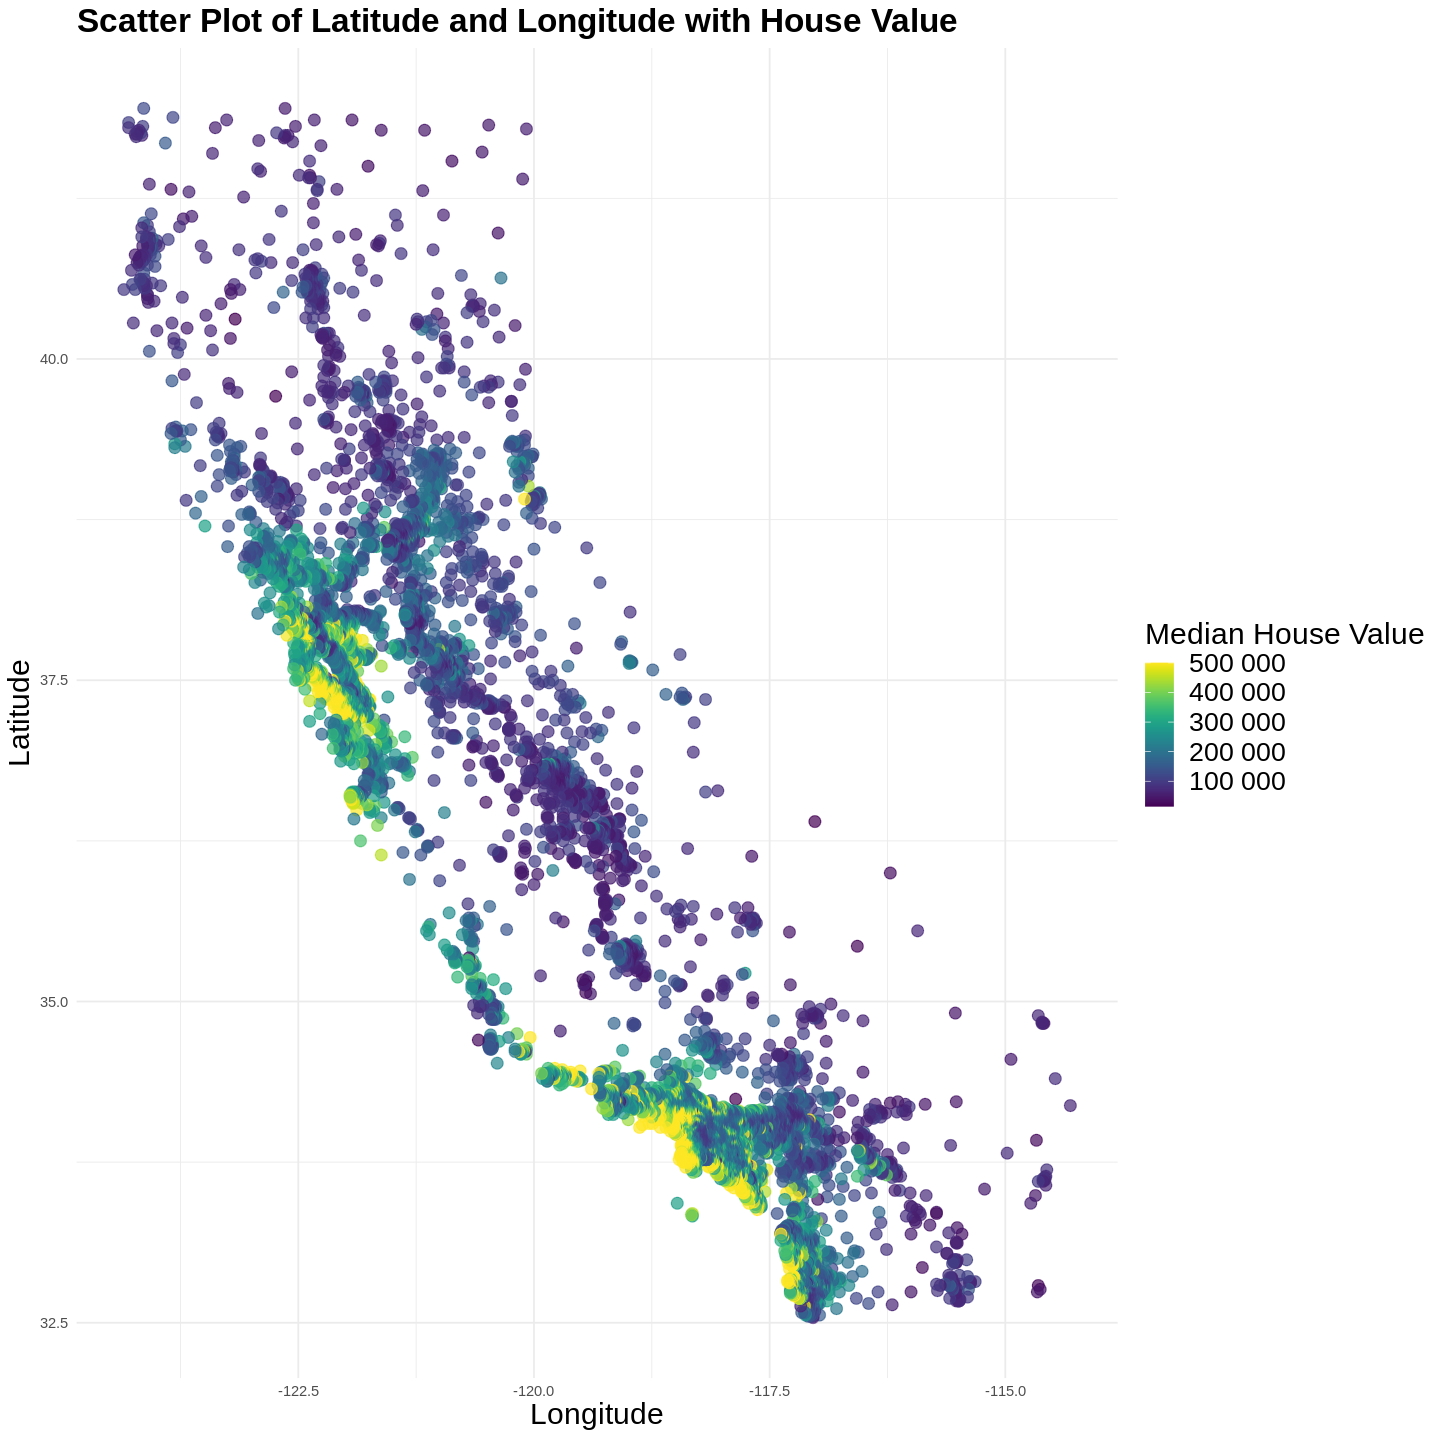

In [6]:
ggplot(df, aes(x = longitude, y = latitude, color = median_house_value)) +
  geom_point(alpha = 0.7, size = 3) +
  scale_color_viridis(name = "Median House Value",labels = scales::label_number()) +
  labs(title = 'Scatter Plot of Latitude and Longitude with House Value',
       x = 'Longitude', y = 'Latitude') +
  theme_minimal() +
  theme(
    legend.position = "right",
    plot.title = element_text(size = 20, face = "bold"),
    axis.title = element_text(size = 18),
    legend.text = element_text(size = 16),
    legend.title = element_text(size = 18)
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


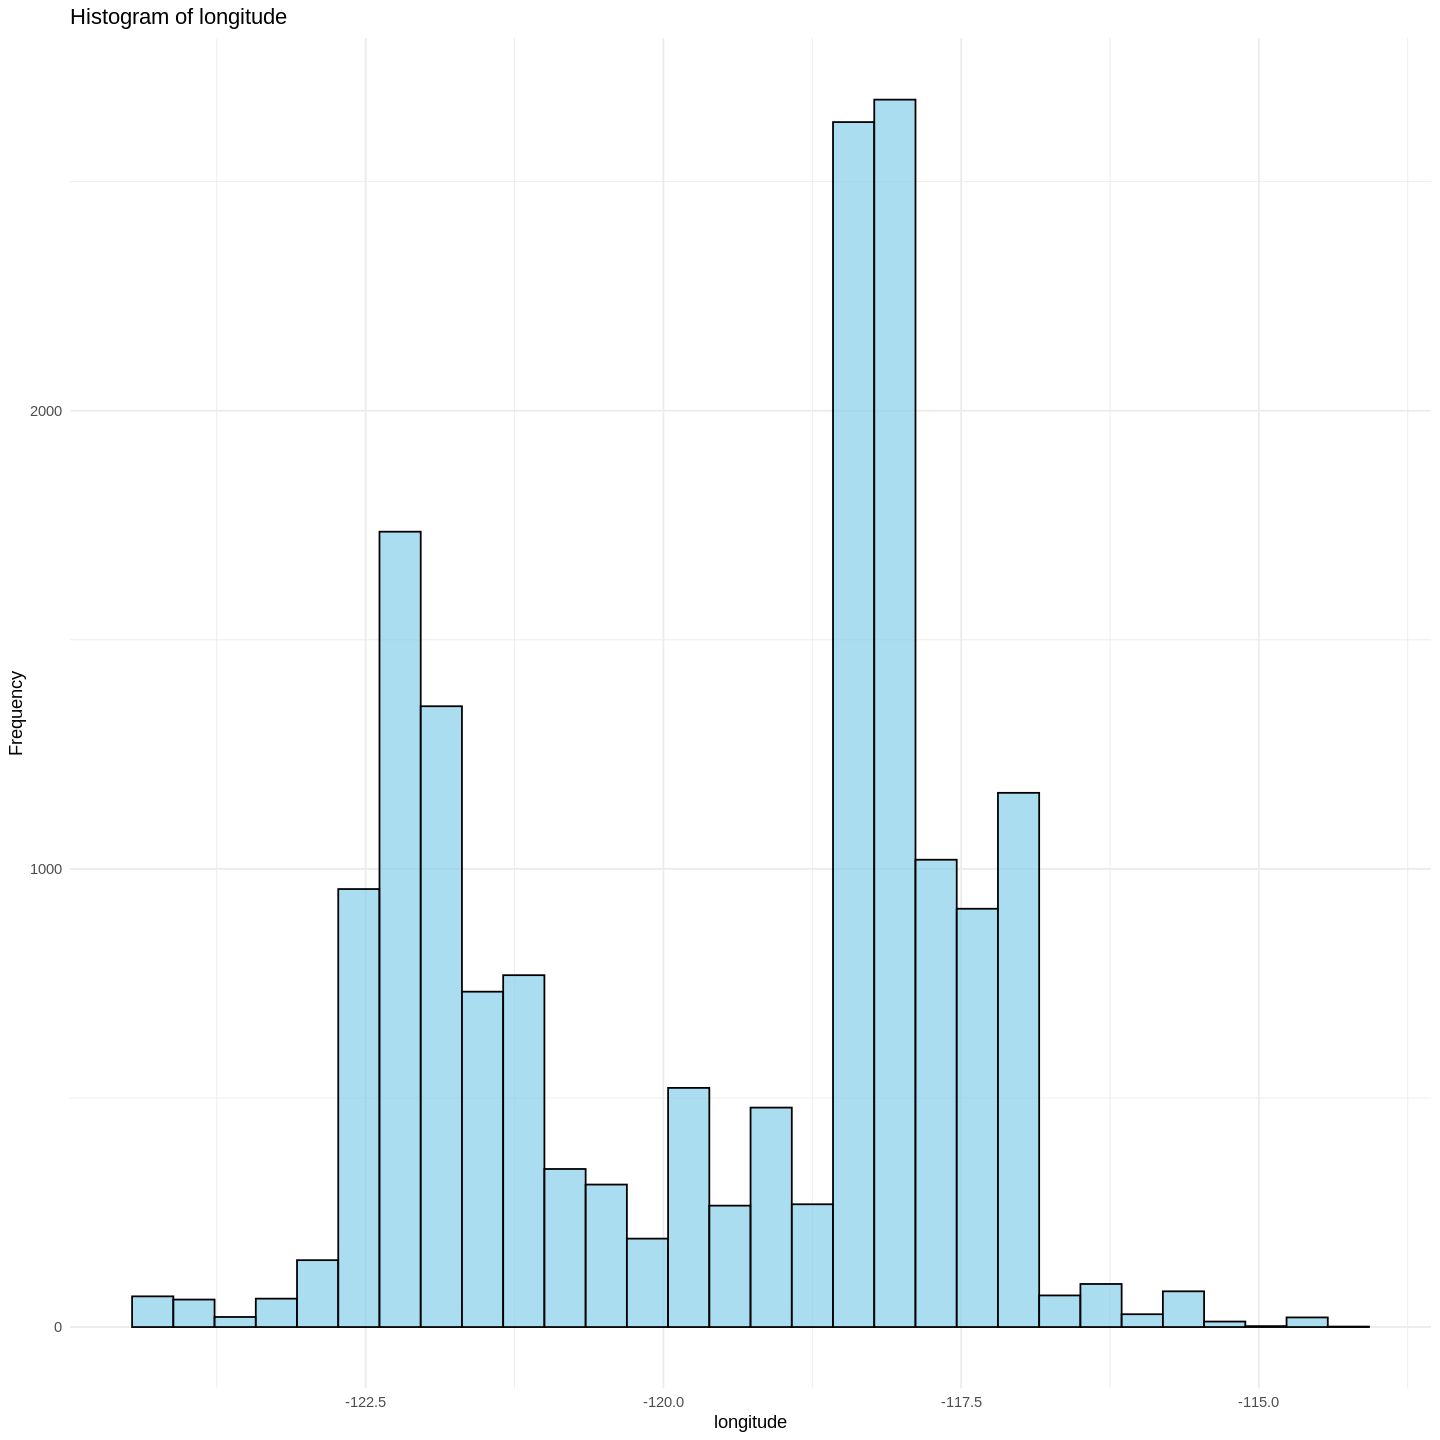

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


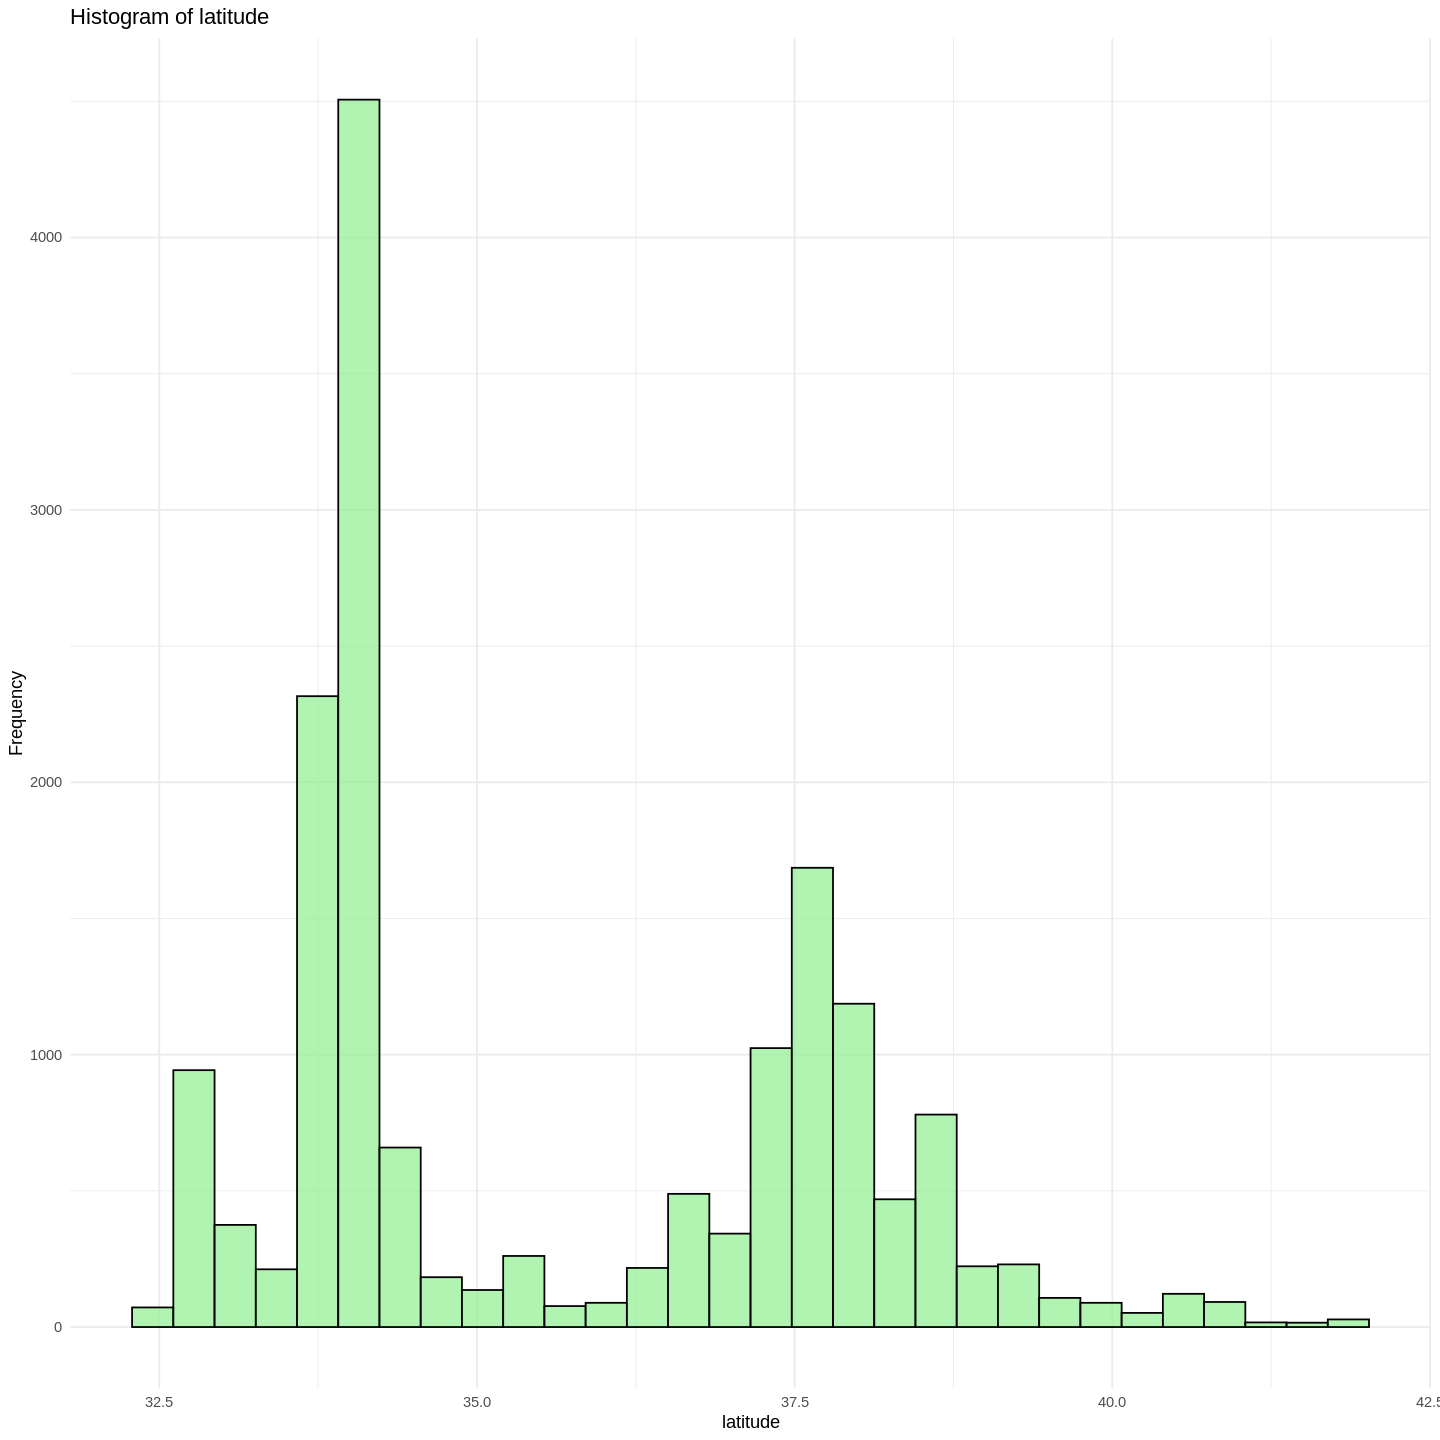

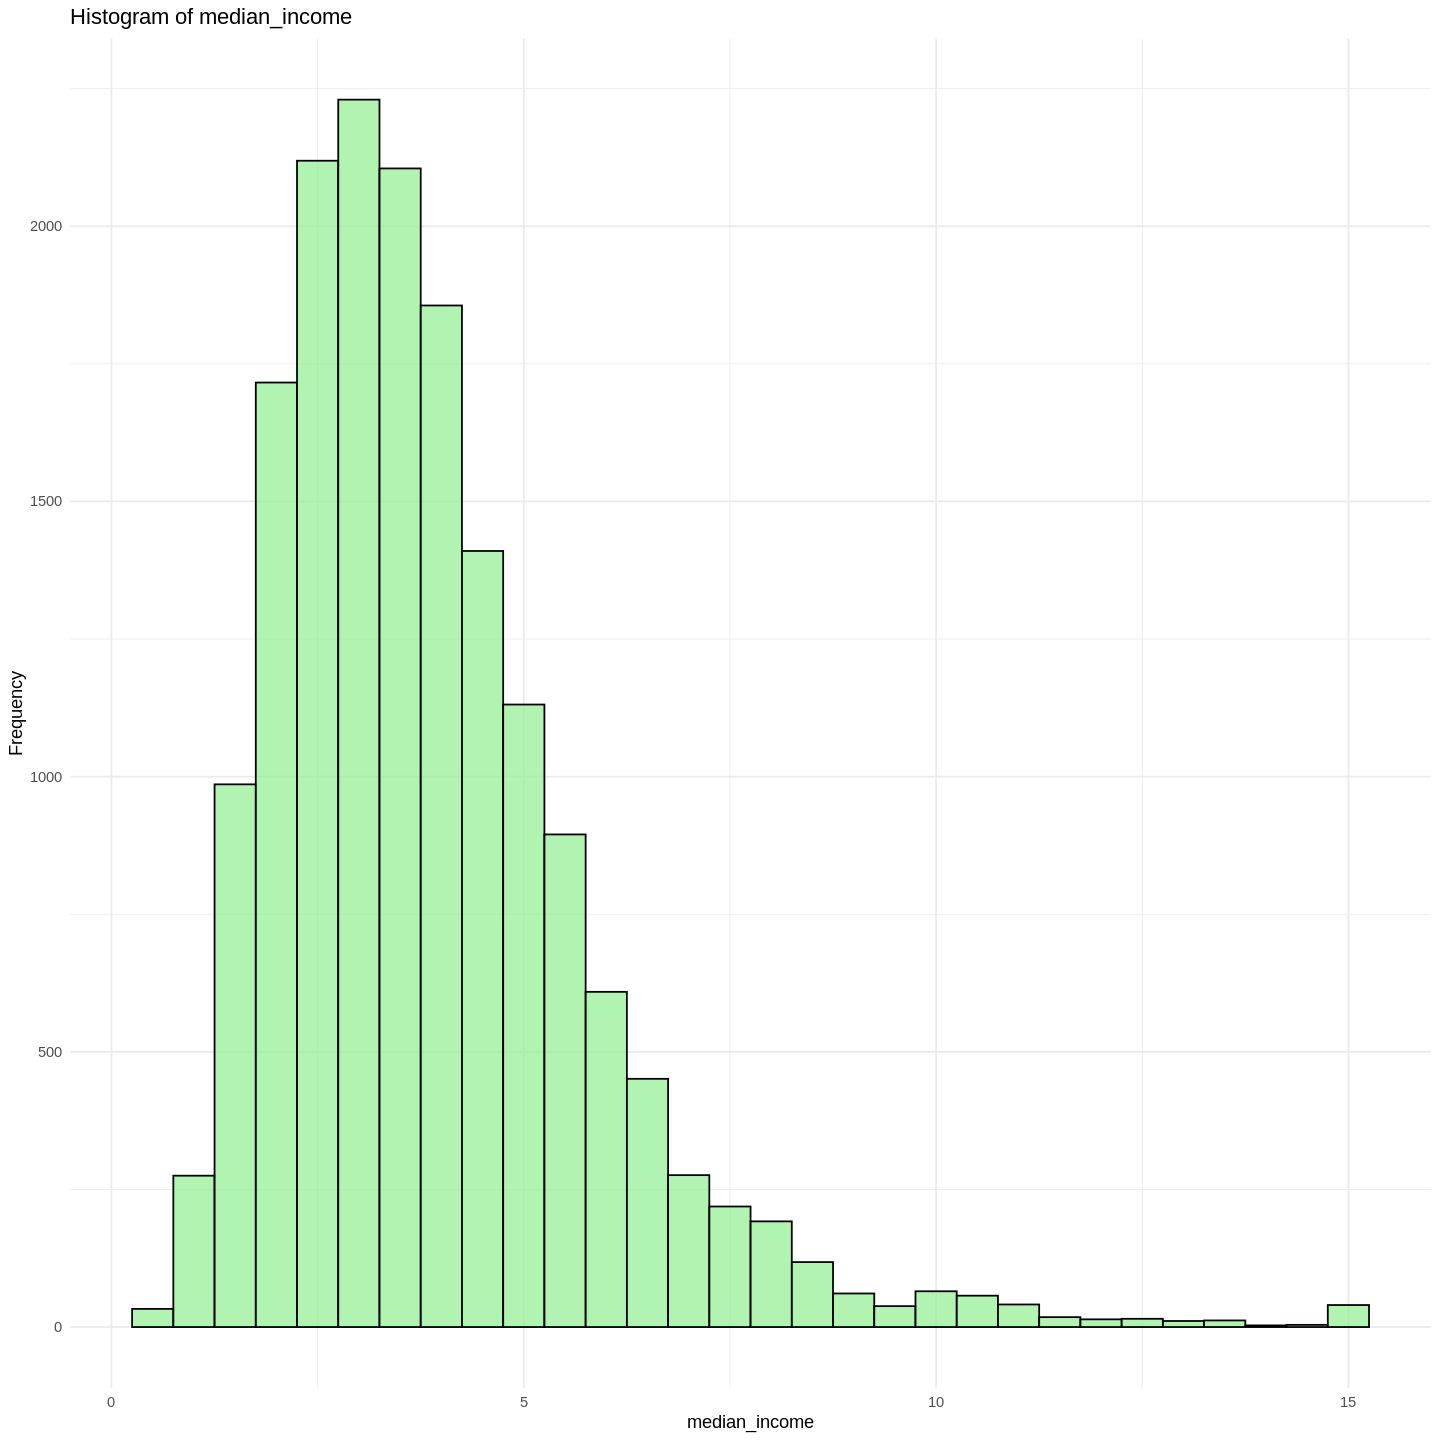

In [7]:
ggplot(data = df, aes(x = longitude)) +
  geom_histogram(fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of longitude", x = "longitude", y = "Frequency") +
  theme_minimal()

ggplot(data = df, aes(x = latitude)) +
  geom_histogram(fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of latitude", x = "latitude", y = "Frequency") +
  theme_minimal()

ggplot(data = df, aes(x = median_income)) +
  geom_histogram(fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of median_income", x = "median_income", y = "Frequency") +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


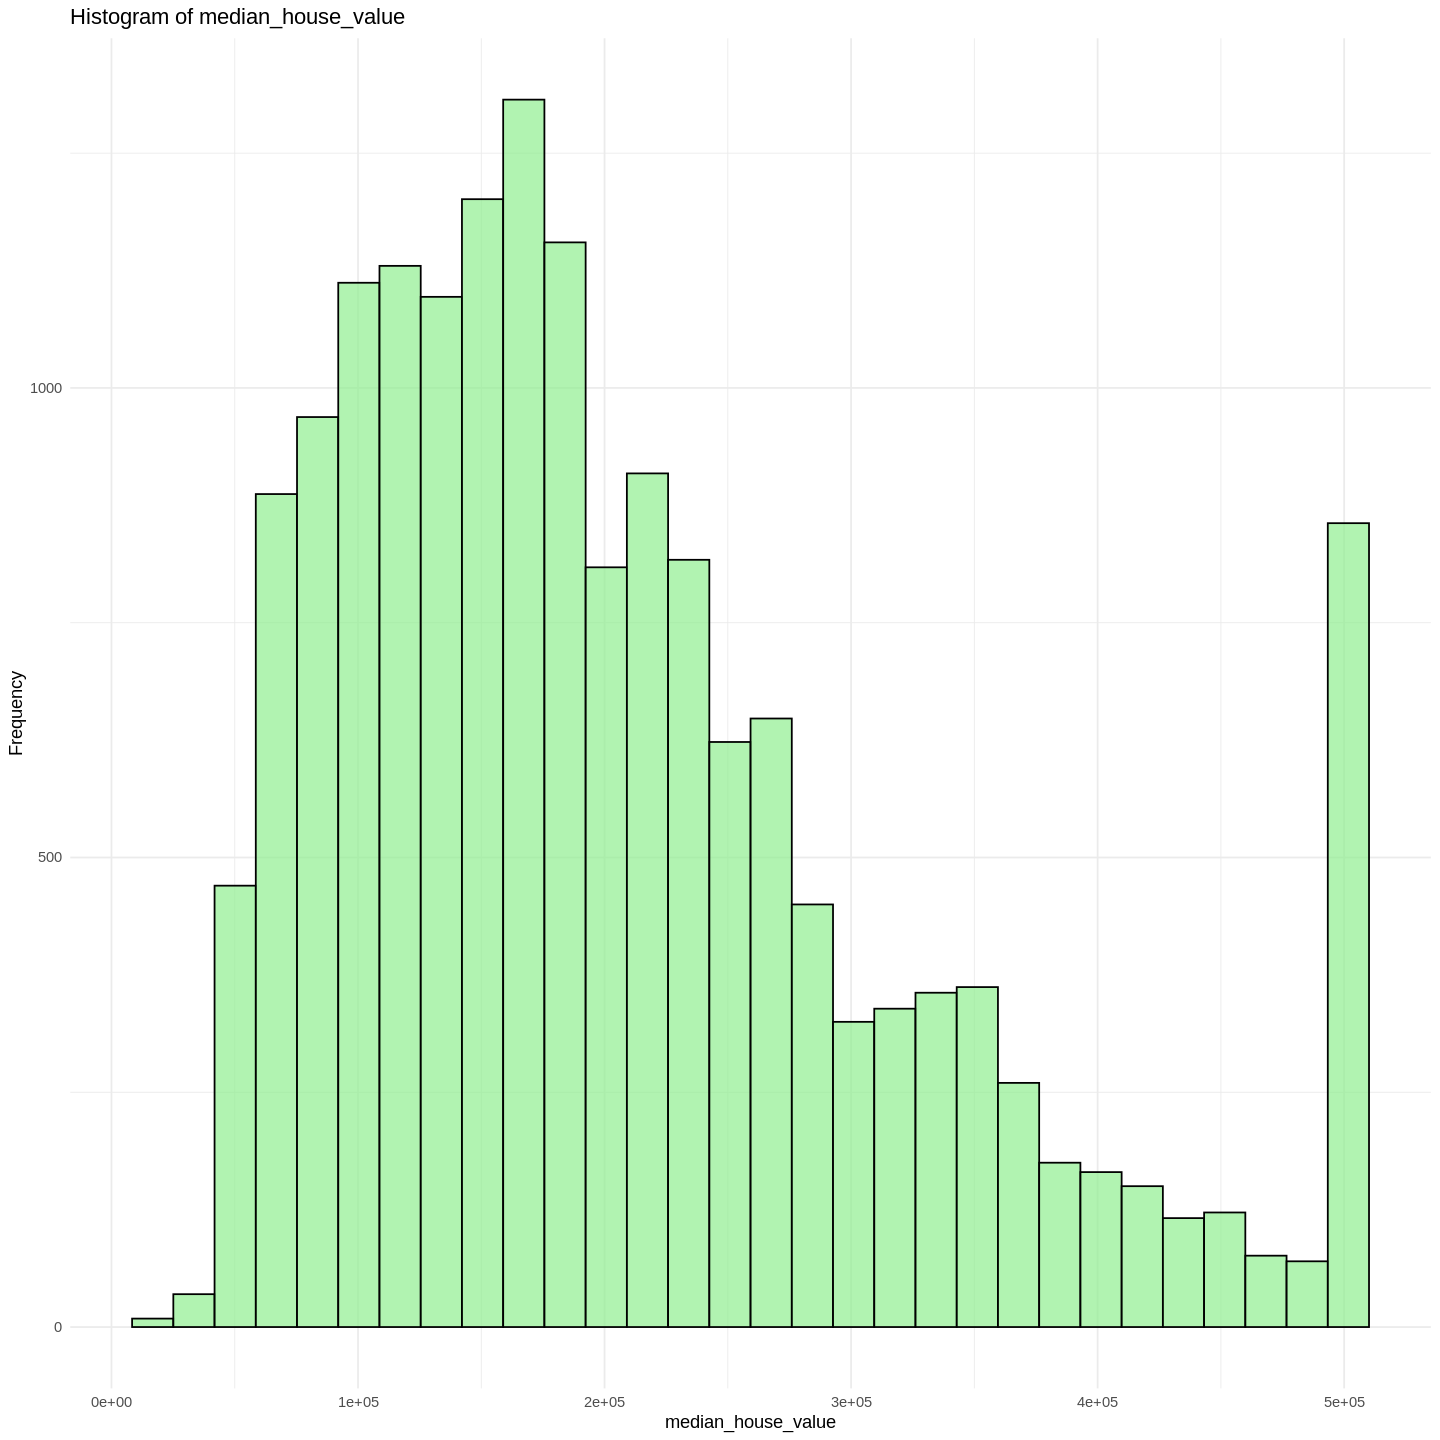

In [8]:
ggplot(data = df, aes(x = median_house_value)) +
  geom_histogram(fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of median_house_value", x = "median_house_value", y = "Frequency") +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


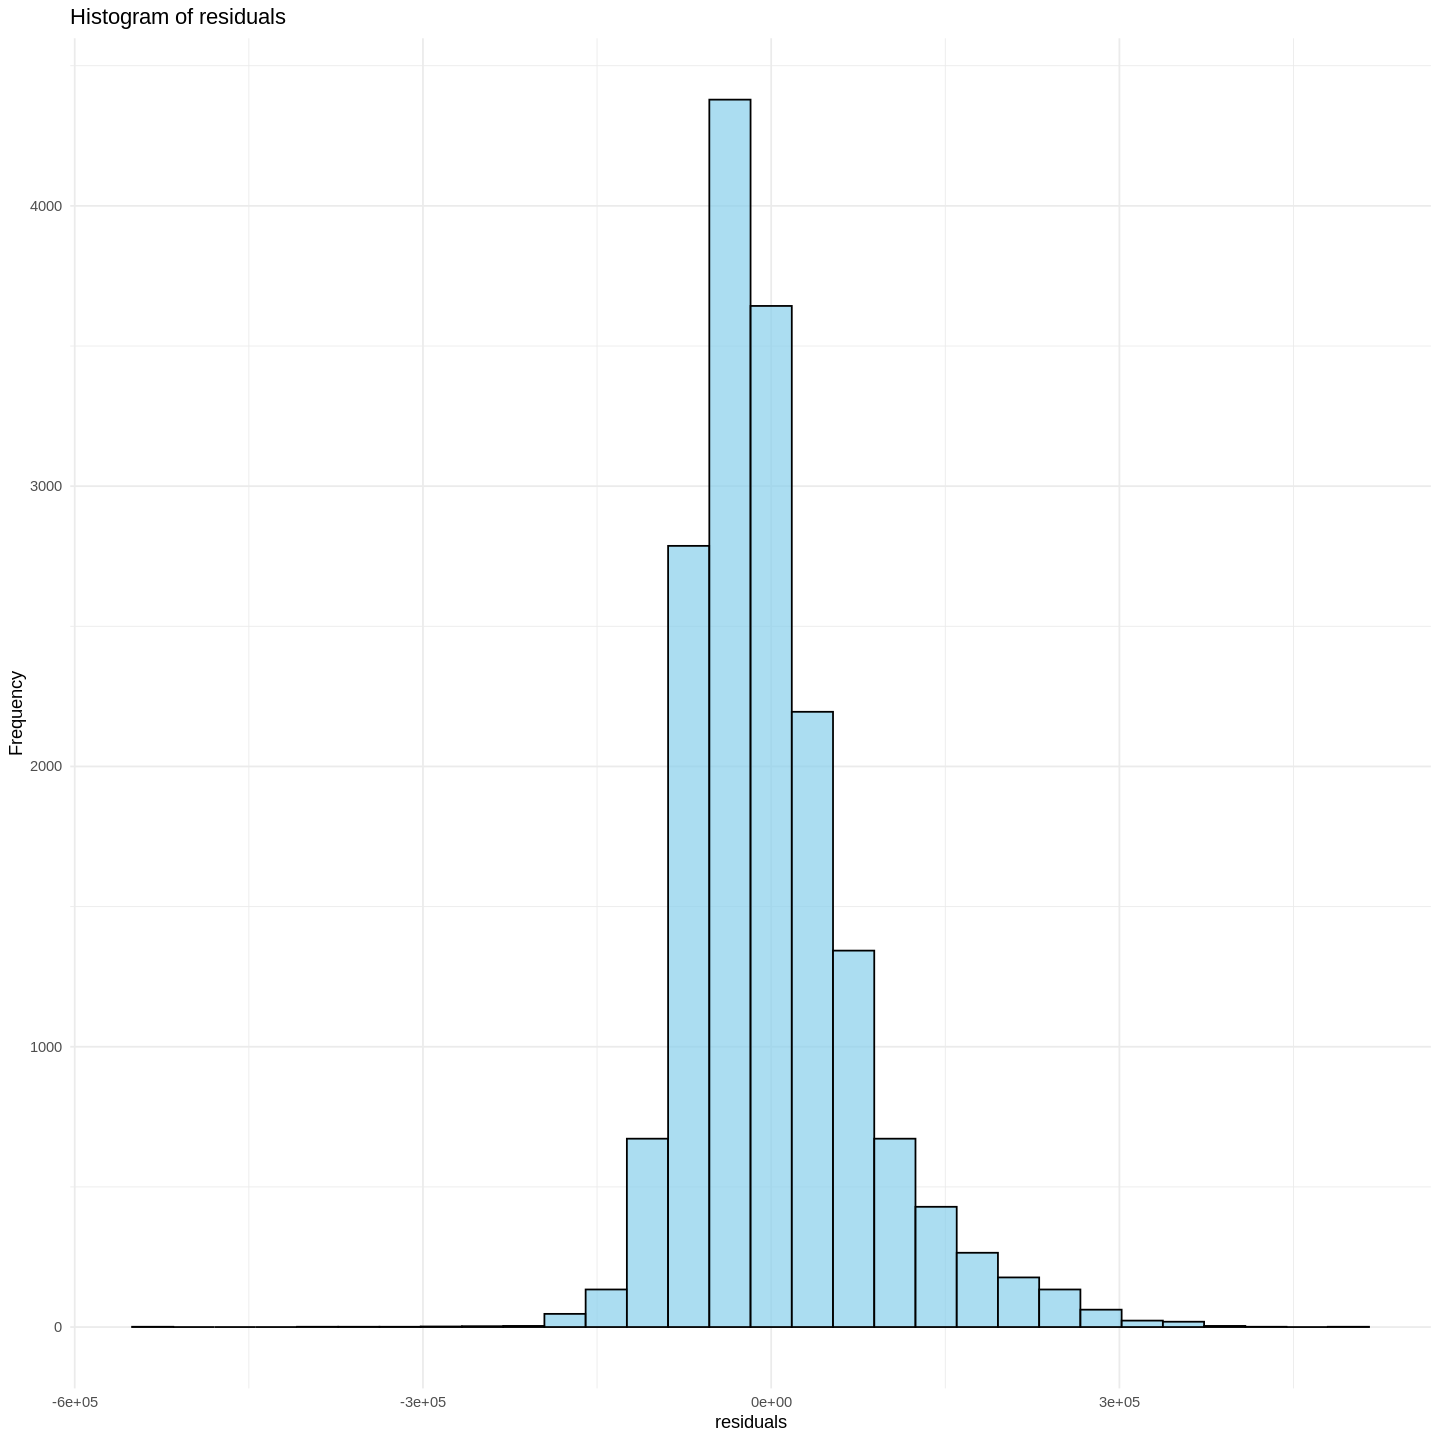

In [9]:
# hist(model$residual)
ggplot(data = df, aes(x = model$residual)) +
  geom_histogram(fill = "Skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of residuals", x = "residuals", y = "Frequency") +
  theme_minimal()

In [10]:
processed_df <- df[df$median_house_value < 350000, ]
head(processed_df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
2,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
3,-114.56,33.69,17,720,174,333,117,1.6509,85700
4,-114.57,33.64,14,1501,337,515,226,3.1917,73400
5,-114.57,33.57,20,1454,326,624,262,1.9250,65500
6,-114.58,33.63,29,1387,236,671,239,3.3438,74000


In [17]:
model2 <- lm(median_house_value ~ median_income + latitude + longitude + housing_median_age, data = processed_df)
summary(model2)


Call:
lm(formula = median_house_value ~ median_income + latitude + 
    longitude + housing_median_age, data = processed_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-412156  -35016   -6792   29546  230739 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.079e+06  5.103e+04 -60.339  < 2e-16 ***
median_income       2.981e+04  3.143e+02  94.849  < 2e-16 ***
latitude           -3.621e+04  5.294e+02 -68.401  < 2e-16 ***
longitude          -3.707e+04  5.750e+02 -64.460  < 2e-16 ***
housing_median_age  2.891e+02  3.594e+01   8.046 9.23e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50210 on 14778 degrees of freedom
Multiple R-squared:  0.5554,	Adjusted R-squared:  0.5553 
F-statistic:  4616 on 4 and 14778 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


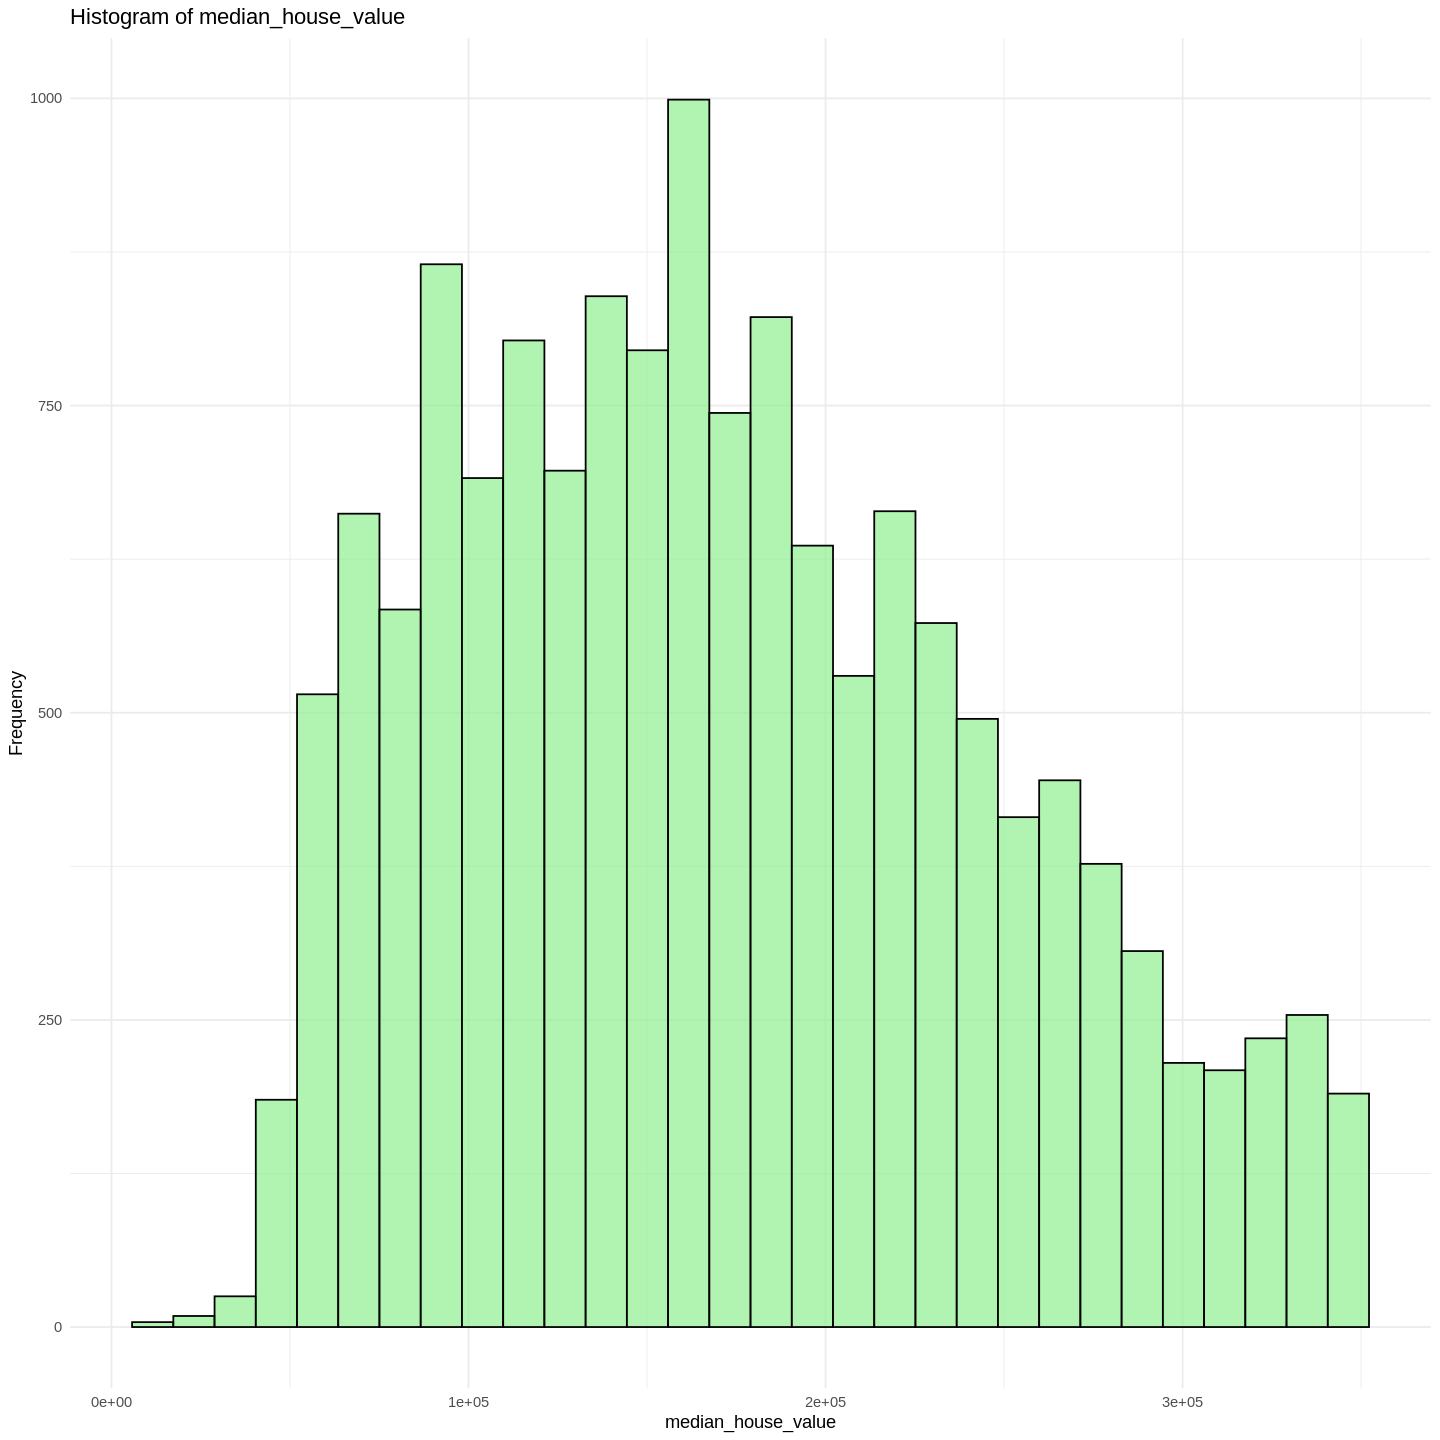

In [18]:
ggplot(data = processed_df, aes(x = median_house_value)) +
  geom_histogram(fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Histogram of median_house_value", x = "median_house_value", y = "Frequency") +
  theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


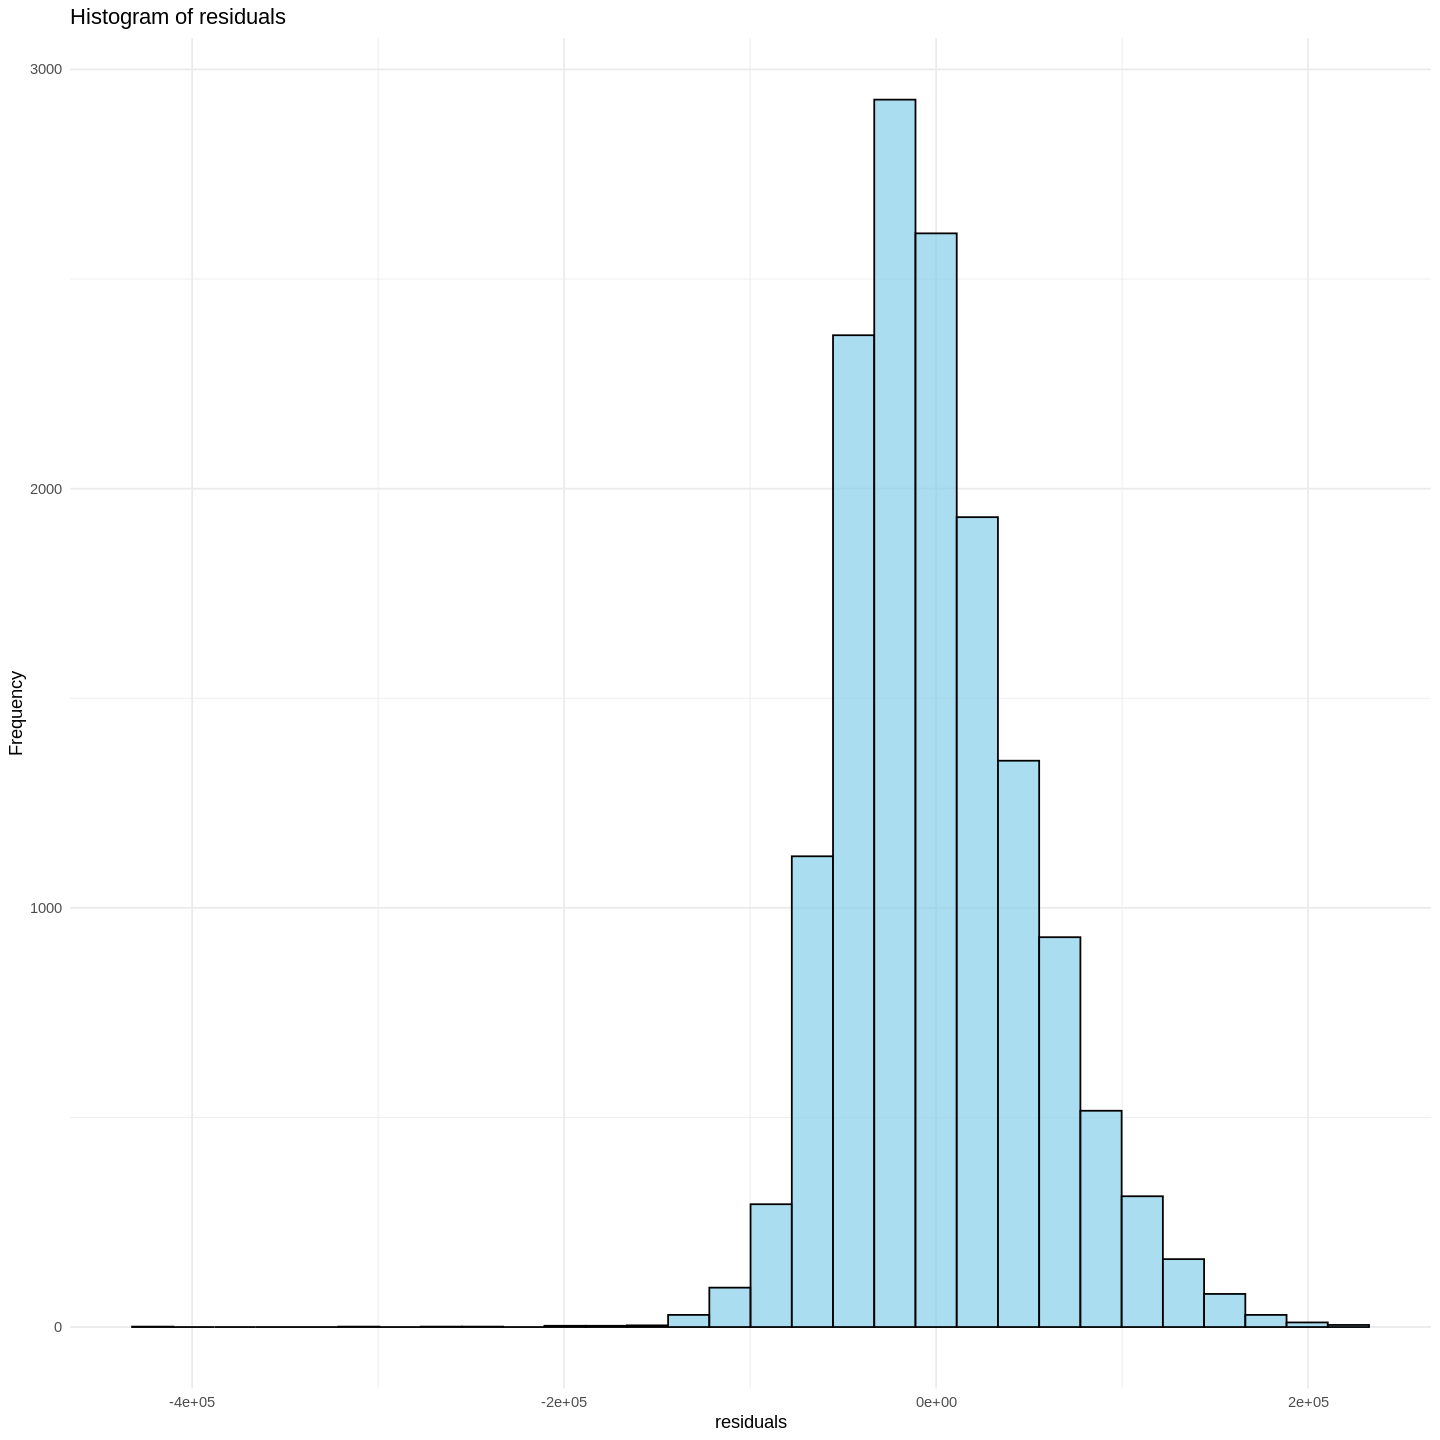

In [19]:
# hist(model2$residual)
ggplot(data = processed_df, aes(x = model2$residual)) +
  geom_histogram(fill = "Skyblue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of residuals", x = "residuals", y = "Frequency") +
  theme_minimal()

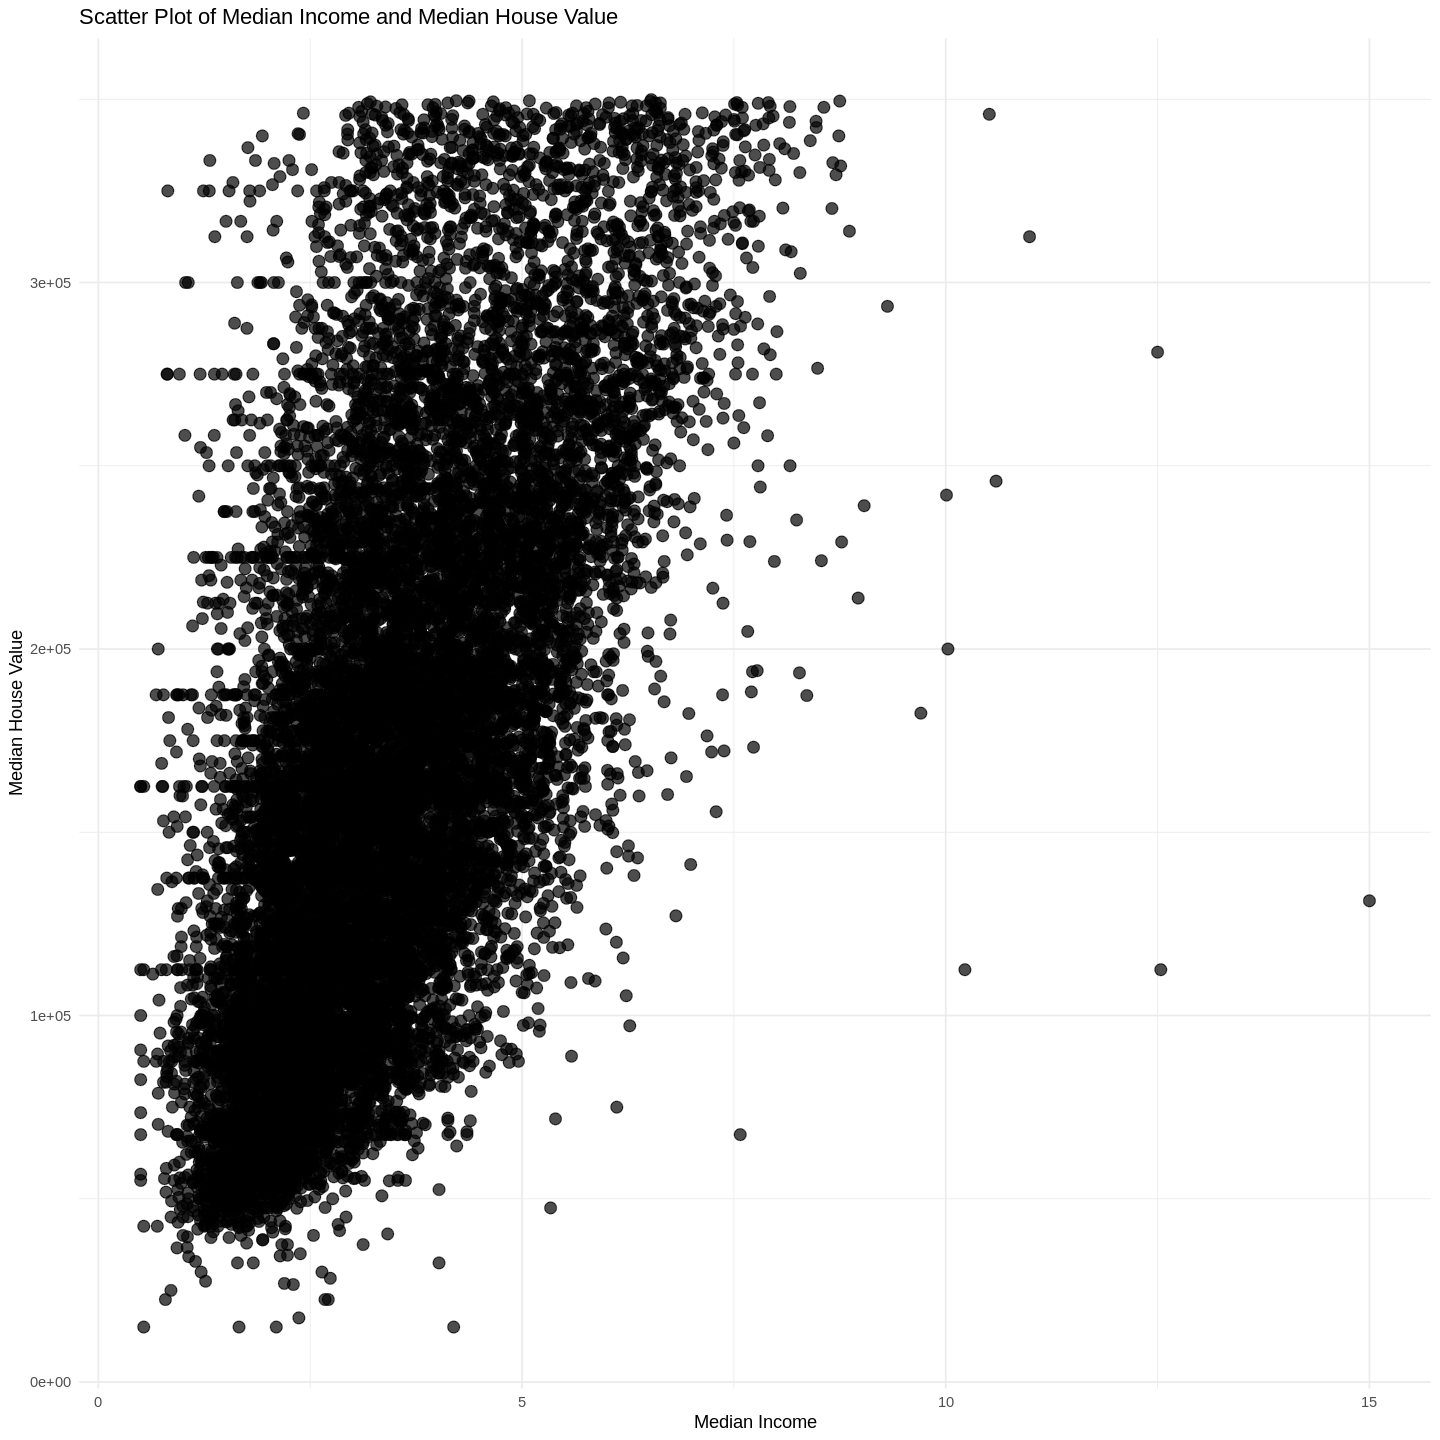

In [20]:
ggplot(data = processed_df, aes(x = median_income, y = median_house_value)) +
  geom_point(alpha = 0.7, size = 3) +
  scale_color_viridis(name = "Median House Value",labels = scales::label_number()) +
  labs(title = 'Scatter Plot of Median Income and Median House Value',
       x = 'Median Income', y = 'Median House Value') +
  theme_minimal()


In [21]:
coef(model2)

(Intercept)      median_income           latitude          longitude 
     -3079109.1442         29809.2119        -36209.9238        -37067.4906 
housing_median_age 
          289.1274

In [22]:
cat("Equation of the line: f(y) =", coef(model2)[2], "* x1 +",coef(model2)[3], "* x2 +",coef(model2)[4], "* x3 +", coef(model2)[1])

Equation of the line: f(y) = 29809.21 * x1 + -36209.92 * x2 + -37067.49 * x3 + -3079109

To - do (rgl not working in Colab)